In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
intensities_path = '../data/intensities_filtered_stg7.csv'
parameters_path = '../data/parameters_data.csv'

In [3]:
intensities = pd.read_csv(intensities_path)
parameters = pd.read_csv(parameters_path)

In [4]:
intensities.head()

,Time,Intensities,Hour
0,2024-12-02 10:45:41.102451801,"-1.23,-6.31,-2.98,5.81,4.17,-4.02,1.74,1.86,-0...",10
1,2024-12-02 10:45:42.156838417,"3.77,-2.31,-0.98,5.81,3.17,-5.02,5.74,-1.14,1....",10
2,2024-12-02 10:45:43.165356636,"-0.23,-2.31,-1.98,8.81,5.17,-5.02,2.74,1.86,2....",10
3,2024-12-02 10:45:44.217716217,"-1.23,-1.31,-0.98,2.81,4.17,-3.02,5.74,0.86,-0...",10
4,2024-12-02 10:45:45.271930218,"3.77,-5.31,-4.98,4.81,11.17,-4.02,-0.26,-0.14,...",10


In [5]:
parameters.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL
0,2024-11-14 18:01:24.490070820,NaN,0.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-14 18:01:24.585421085,0.1621,0.589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-11-14 18:01:29.786182404,0.1621,0.589,NaN,NaN,NaN,NaN,NaN,-1.9428,NaN,NaN,NaN,NaN
3,2024-11-14 18:01:46.486213207,0.1621,0.589,NaN,NaN,NaN,NaN,-1.1545,-1.9428,NaN,NaN,NaN,NaN
4,2024-11-14 18:01:46.489224434,0.1621,0.589,NaN,NaN,NaN,NaN,-1.1545,-1.9428,-2.6935,NaN,NaN,NaN


In [6]:
intensities['Time'] = pd.to_datetime(intensities['Time'])
parameters['Time'] = pd.to_datetime(parameters['Time'])

In [7]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234763 entries, 0 to 234762
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         234763 non-null  datetime64[ns]
 1   Intensities  234763 non-null  object        
 2   Hour         234763 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.4+ MB


In [8]:
parameters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400797 entries, 0 to 4400796
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Time                      datetime64[ns]
 1   L1-PL3-PZM52:Setpoint     float64       
 2   L1-PL3-PZM53:Setpoint     float64       
 3   L1-PL3-PZM56:Setpoint     float64       
 4   L1-PL3-PZM57:Setpoint     float64       
 5   L1-PL3-PZM58:Setpoint     float64       
 6   L1-PL3-PZM59:Setpoint     float64       
 7   L1-PL4-PZM66:Setpoint     float64       
 8   L1-PL4-PZM67:Setpoint     float64       
 9   L1-PL4-PZM68:Setpoint     float64       
 10  L1-PL4-PZM69:Setpoint     float64       
 11  L1-INJ-PM70:VAL_CAL       float64       
 12  L1-OPA3-5_2-PM98:VAL_CAL  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 436.5 MB


In [9]:
intensities = intensities.sort_values(by='Time')
parameters = parameters.sort_values(by='Time')

# Filter data
- filter out weekends
- keep only parameters in [7:00-20:00)
- filter out problematic dates 18.11.-20.11.

In [10]:
dates_list = [
    "2024-11-21", "2024-11-22", "2024-11-25", "2024-11-26", "2024-11-27",
    "2024-11-28", "2024-11-29", "2024-12-02", "2024-12-03", "2024-12-04",
    "2024-12-05", "2024-12-06", "2024-12-09", "2024-12-10", "2024-12-11"
]

parameters = parameters[
    (parameters['Time'].dt.date.astype(str).isin(dates_list)) &  
    (parameters['Time'].dt.hour >= 7) &  # Keep only hours >= 07:00
    (parameters['Time'].dt.hour < 20)    # Keep only hours < 20:00
].copy()

In [11]:
parameters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4105651 entries, 295057 to 4400786
Data columns (total 13 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Time                      datetime64[ns]
 1   L1-PL3-PZM52:Setpoint     float64       
 2   L1-PL3-PZM53:Setpoint     float64       
 3   L1-PL3-PZM56:Setpoint     float64       
 4   L1-PL3-PZM57:Setpoint     float64       
 5   L1-PL3-PZM58:Setpoint     float64       
 6   L1-PL3-PZM59:Setpoint     float64       
 7   L1-PL4-PZM66:Setpoint     float64       
 8   L1-PL4-PZM67:Setpoint     float64       
 9   L1-PL4-PZM68:Setpoint     float64       
 10  L1-PL4-PZM69:Setpoint     float64       
 11  L1-INJ-PM70:VAL_CAL       float64       
 12  L1-OPA3-5_2-PM98:VAL_CAL  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 438.5 MB


In [12]:
dates_list = [
    "2024-11-21", "2024-11-22", "2024-11-25", "2024-11-26", "2024-11-27",
    "2024-11-28", "2024-11-29", "2024-12-02", "2024-12-03", "2024-12-04",
    "2024-12-05", "2024-12-06", "2024-12-09", "2024-12-10", "2024-12-11"
]

intensities = intensities[
    (intensities['Time'].dt.date.astype(str).isin(dates_list)) &  
    (intensities['Time'].dt.hour >= 7) &  # Keep only hours >= 07:00
    (intensities['Time'].dt.hour < 20)    # Keep only hours < 20:00
].copy()

In [13]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214215 entries, 138643 to 118094
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Time         214215 non-null  datetime64[ns]
 1   Intensities  214215 non-null  object        
 2   Hour         214215 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.5+ MB


# Check time gaps

In [14]:
intensities['time_diff'] = intensities['Time'].diff()
parameters['time_diff'] = parameters['Time'].diff()

In [15]:
intensities.head()

,Time,Intensities,Hour,time_diff
138643,2024-11-21 10:14:13.954589367,"-2.23,-1.31,-4.98,4.81,7.17,-5.02,2.74,1.86,-0...",10,NaT
138644,2024-11-21 10:14:14.964668751,"1.77,-2.31,-4.98,2.81,8.17,-3.02,4.74,-2.14,-1...",10,0 days 00:00:01.010079384
138645,2024-11-21 10:14:16.018996716,"-7.23,-2.31,-0.98,3.81,6.17,-6.02,4.74,-2.14,1...",10,0 days 00:00:01.054327965
138646,2024-11-21 10:14:17.021016121,"0.77,0.69,-5.98,4.81,7.17,-3.02,2.74,-2.14,1.6...",10,0 days 00:00:01.002019405
138647,2024-11-21 10:14:18.027237415,"-1.23,-1.31,-4.98,4.81,9.17,-2.02,0.74,-4.14,2...",10,0 days 00:00:01.006221294


In [16]:
parameters.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff
295057,2024-11-21 07:40:19.941258907,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,NaN,NaT
295058,2024-11-21 07:59:59.067985058,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.76,0 days 00:19:39.126726151
295059,2024-11-21 08:00:00.850240231,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.68,0 days 00:00:01.782255173
295060,2024-11-21 08:00:01.127808094,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.75,0 days 00:00:00.277567863
295061,2024-11-21 08:00:01.420823097,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.66,0 days 00:00:00.293015003


In [17]:
intensities[~(intensities['Time'].dt.date != intensities['Time'].shift(1).dt.date)]['time_diff'].describe()

count                       214200
mean     0 days 00:00:02.059756180
std      0 days 00:01:27.862349498
min      0 days 00:00:00.901248932
25%      0 days 00:00:01.007975102
50%      0 days 00:00:01.055523872
75%      0 days 00:00:01.059545517
max      0 days 05:01:34.586709499
Name: time_diff, dtype: object

In [18]:
intensities[~(intensities['Time'].dt.date != intensities['Time'].shift(1).dt.date) 
& (intensities['time_diff'].dt.total_seconds() > 3600)]

,Time,Intensities,Hour,time_diff
152446,2024-11-21 19:00:42.462043762,"-0.23,-1.31,-4.98,5.81,6.17,-1.02,4.74,2.86,2....",19,0 days 02:29:39.433416366
171795,2024-11-25 13:06:38.637368202,"-2.23,-2.31,-3.98,7.81,5.17,-6.02,3.74,3.86,1....",13,0 days 01:15:05.479767322
180748,2024-11-25 18:30:16.020133495,"-0.23,-5.31,-2.98,7.81,7.17,-7.02,0.74,2.86,4....",18,0 days 01:15:36.731304645
181067,2024-11-26 12:54:33.330755234,"0.77,-6.31,-4.98,8.81,7.17,-5.02,0.74,-1.14,0....",12,0 days 01:28:35.092881680
187356,2024-11-26 16:16:57.866463184,"2.77,-4.31,-4.98,0.81,6.17,-2.02,3.74,-0.14,3....",16,0 days 01:32:31.481216907
202239,2024-11-27 15:57:37.525177479,"-2.23,-2.31,-3.98,3.81,5.17,-6.02,1.74,0.86,-2...",15,0 days 02:43:07.257166863
204771,2024-11-27 18:34:44.547430515,"-3.23,-2.31,3.02,3.81,6.17,-6.02,5.74,-0.14,1....",18,0 days 01:52:53.883945942
213790,2024-11-28 13:52:59.672552109,"2.77,-6.31,-4.98,3.81,8.17,-6.02,6.74,2.86,2.6...",13,0 days 01:58:17.712305546
234239,2024-11-29 17:43:09.193954468,"-6.23,-1.31,-2.98,7.81,6.17,-8.02,6.74,1.86,0....",17,0 days 02:50:14.543662548
15489,2024-12-02 19:15:43.543780804,"0.77,-2.31,-1.98,4.81,7.17,-7.02,4.74,1.86,0.6...",19,0 days 03:59:16.583819866


In [19]:
intensities[~(intensities['Time'].dt.date != intensities['Time'].shift(1).dt.date) 
& (intensities['time_diff'].dt.total_seconds() > 1800)]

,Time,Intensities,Hour,time_diff
142277,2024-11-21 11:54:23.217315197,"-5.23,-1.31,-4.98,3.81,4.17,-5.02,1.74,3.86,1....",11,0 days 00:36:41.030279160
143833,2024-11-21 13:07:27.088943005,"-2.23,-4.31,-4.98,5.81,10.17,-7.02,1.74,2.86,4...",13,0 days 00:45:53.759880543
145881,2024-11-21 14:32:27.298332691,"1.77,-7.31,-3.98,7.81,7.17,-2.02,4.74,3.86,3.6...",14,0 days 00:45:23.323485374
152446,2024-11-21 19:00:42.462043762,"-0.23,-1.31,-4.98,5.81,6.17,-1.02,4.74,2.86,2....",19,0 days 02:29:39.433416366
157672,2024-11-22 12:41:13.455463409,"-2.23,-5.31,-3.98,7.81,7.17,-5.02,3.74,1.86,2....",12,0 days 00:50:54.365773201
168801,2024-11-22 16:48:05.905415058,"-2.23,-1.31,3.02,4.81,6.17,-6.02,4.74,2.86,-2....",16,0 days 00:45:42.882299900
171795,2024-11-25 13:06:38.637368202,"-2.23,-2.31,-3.98,7.81,5.17,-6.02,3.74,3.86,1....",13,0 days 01:15:05.479767322
177957,2024-11-25 15:45:41.196080208,"0.77,0.69,-0.98,9.81,7.17,-3.02,6.74,2.86,3.6,...",15,0 days 00:35:59.578090668
180748,2024-11-25 18:30:16.020133495,"-0.23,-5.31,-2.98,7.81,7.17,-7.02,0.74,2.86,4....",18,0 days 01:15:36.731304645
181067,2024-11-26 12:54:33.330755234,"0.77,-6.31,-4.98,8.81,7.17,-5.02,0.74,-1.14,0....",12,0 days 01:28:35.092881680


In [20]:
intensities[~(intensities['Time'].dt.date != intensities['Time'].shift(1).dt.date) 
& (intensities['time_diff'].dt.total_seconds() > 900)]

,Time,Intensities,Hour,time_diff
142277,2024-11-21 11:54:23.217315197,"-5.23,-1.31,-4.98,3.81,4.17,-5.02,1.74,3.86,1....",11,0 days 00:36:41.030279160
143833,2024-11-21 13:07:27.088943005,"-2.23,-4.31,-4.98,5.81,10.17,-7.02,1.74,2.86,4...",13,0 days 00:45:53.759880543
145881,2024-11-21 14:32:27.298332691,"1.77,-7.31,-3.98,7.81,7.17,-2.02,4.74,3.86,3.6...",14,0 days 00:45:23.323485374
152446,2024-11-21 19:00:42.462043762,"-0.23,-1.31,-4.98,5.81,6.17,-1.02,4.74,2.86,2....",19,0 days 02:29:39.433416366
157672,2024-11-22 12:41:13.455463409,"-2.23,-5.31,-3.98,7.81,7.17,-5.02,3.74,1.86,2....",12,0 days 00:50:54.365773201
168801,2024-11-22 16:48:05.905415058,"-2.23,-1.31,3.02,4.81,6.17,-6.02,4.74,2.86,-2....",16,0 days 00:45:42.882299900
170952,2024-11-22 17:56:22.259310246,"-1.23,-2.31,-1.98,4.81,8.17,-6.02,1.74,2.86,0....",17,0 days 00:27:07.190799714
171795,2024-11-25 13:06:38.637368202,"-2.23,-2.31,-3.98,7.81,5.17,-6.02,3.74,3.86,1....",13,0 days 01:15:05.479767322
177524,2024-11-25 15:02:08.990836620,"-0.23,-4.31,-1.98,7.81,10.17,-7.02,2.74,2.86,1...",15,0 days 00:15:23.429679870
177957,2024-11-25 15:45:41.196080208,"0.77,0.69,-0.98,9.81,7.17,-3.02,6.74,2.86,3.6,...",15,0 days 00:35:59.578090668


In [21]:
parameters[~(parameters['Time'].dt.date != parameters['Time'].shift(1).dt.date)]['time_diff'].describe()

count                      4105636
mean     0 days 00:00:00.160295864
std      0 days 00:00:01.806559034
min                0 days 00:00:00
25%      0 days 00:00:00.001436234
50%      0 days 00:00:00.083471775
75%      0 days 00:00:00.235702157
max      0 days 00:36:59.733290196
Name: time_diff, dtype: object

In [22]:
parameters[~(parameters['Time'].dt.date != parameters['Time'].shift(1).dt.date) 
& (parameters['time_diff'].dt.total_seconds() > 3600)]

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff


In [23]:
parameters[~(parameters['Time'].dt.date != parameters['Time'].shift(1).dt.date) 
& (parameters['time_diff'].dt.total_seconds() > 1800)]

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff
2888064,2024-12-05 07:59:59.854441166,-0.5009,-0.2057,-0.4333,-1.1797,0.0,0.0,NaN,NaN,NaN,NaN,-0.18,5.77,0 days 00:36:59.733290196


In [24]:
parameters[~(parameters['Time'].dt.date != parameters['Time'].shift(1).dt.date) 
& (parameters['time_diff'].dt.total_seconds() > 900)]

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff
295058,2024-11-21 07:59:59.067985058,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.76,0 days 00:19:39.126726151
1286945,2024-11-27 07:59:46.211721897,-0.4053,-0.1201,-0.9913,-1.5456,-2.0,-1.0,-3.7500,-0.5053,-2.6843,1.6293,-0.23,5.73,0 days 00:15:09.418017864
1567860,2024-11-28 07:59:58.969451904,-0.2411,-0.5235,-0.0909,-0.4147,0.0,1.0,NaN,NaN,NaN,NaN,-0.17,5.71,0 days 00:20:49.836008072
2097466,2024-12-02 07:59:58.874839783,-0.2872,-0.4824,NaN,NaN,NaN,NaN,-2.2853,-0.7822,-2.5498,0.9044,-0.19,5.71,0 days 00:19:19.160082817
2888064,2024-12-05 07:59:59.854441166,-0.5009,-0.2057,-0.4333,-1.1797,0.0,0.0,NaN,NaN,NaN,NaN,-0.18,5.77,0 days 00:36:59.733290196
4178644,2024-12-11 07:47:47.896090984,2.0105,-0.1107,-0.4497,-0.5889,0.0,0.0,-2.8400,-0.7161,-1.9446,1.4426,NaN,NaN,0 days 00:15:11.608490944


# Add parameter L1-INJ-PM70:VAL_CAL_diff

In [25]:
parameters['time_diff_i_i-10'] = parameters['Time'] - parameters['Time'].shift(10)
parameters['time_diff_i-10_i+10'] = parameters['Time'].shift(-10) - parameters['Time'].shift(10)
parameters.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff,time_diff_i_i-10,time_diff_i-10_i+10
295057,2024-11-21 07:40:19.941258907,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,NaN,NaT,NaT,NaT
295058,2024-11-21 07:59:59.067985058,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.76,0 days 00:19:39.126726151,NaT,NaT
295059,2024-11-21 08:00:00.850240231,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.68,0 days 00:00:01.782255173,NaT,NaT
295060,2024-11-21 08:00:01.127808094,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.75,0 days 00:00:00.277567863,NaT,NaT
295061,2024-11-21 08:00:01.420823097,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.66,0 days 00:00:00.293015003,NaT,NaT


In [26]:
parameters['time_diff_i_i-10'].describe()

count                      4105641
mean     0 days 00:00:04.314326195
std      0 days 00:10:24.163475796
min      0 days 00:00:00.016902923
25%      0 days 00:00:00.504018307
50%      0 days 00:00:01.069678306
75%      0 days 00:00:01.670009613
max      2 days 12:00:19.682757854
Name: time_diff_i_i-10, dtype: object

In [27]:
parameters['time_diff_i-10_i+10'].describe()

count                      4105631
mean     0 days 00:00:08.628313467
std      0 days 00:14:43.436969478
min      0 days 00:00:00.154607772
25%      0 days 00:00:01.194882393
50%      0 days 00:00:02.294597626
75%      0 days 00:00:03.186151742
max      2 days 12:01:08.522018910
Name: time_diff_i-10_i+10, dtype: object

In [28]:
parameters['L1-INJ-PM70:VAL_CAL_diff'] = parameters['L1-INJ-PM70:VAL_CAL'].shift(-10) - parameters['L1-INJ-PM70:VAL_CAL'].shift(10)

In [29]:
parameters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4105651 entries, 295057 to 4400786
Data columns (total 17 columns):
 #   Column                    Dtype          
---  ------                    -----          
 0   Time                      datetime64[ns] 
 1   L1-PL3-PZM52:Setpoint     float64        
 2   L1-PL3-PZM53:Setpoint     float64        
 3   L1-PL3-PZM56:Setpoint     float64        
 4   L1-PL3-PZM57:Setpoint     float64        
 5   L1-PL3-PZM58:Setpoint     float64        
 6   L1-PL3-PZM59:Setpoint     float64        
 7   L1-PL4-PZM66:Setpoint     float64        
 8   L1-PL4-PZM67:Setpoint     float64        
 9   L1-PL4-PZM68:Setpoint     float64        
 10  L1-PL4-PZM69:Setpoint     float64        
 11  L1-INJ-PM70:VAL_CAL       float64        
 12  L1-OPA3-5_2-PM98:VAL_CAL  float64        
 13  time_diff                 timedelta64[ns]
 14  time_diff_i_i-10          timedelta64[ns]
 15  time_diff_i-10_i+10       timedelta64[ns]
 16  L1-INJ-PM70:VAL_CAL_diff  float64   

In [30]:
parameters['L1-INJ-PM70:VAL_CAL_diff'].describe()

count    4.105201e+06
mean     1.484215e-05
std      9.231398e-02
min     -3.372000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.419000e+01
Name: L1-INJ-PM70:VAL_CAL_diff, dtype: float64

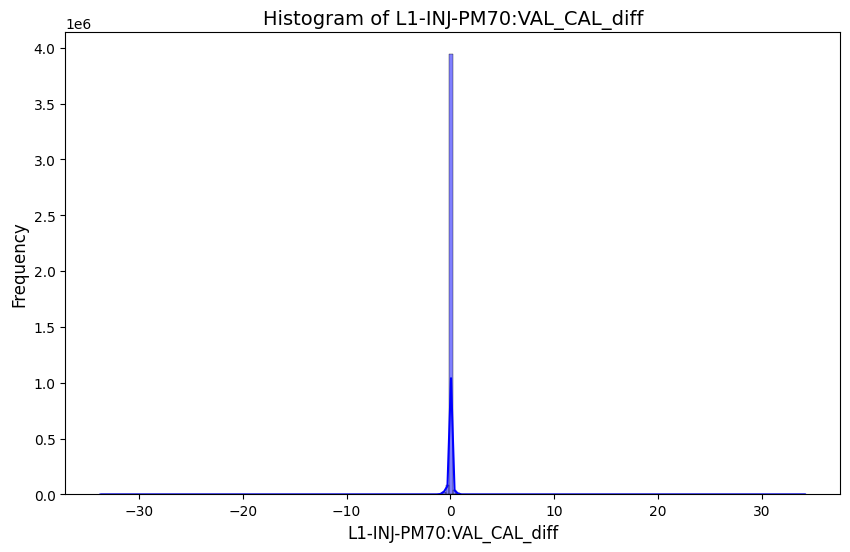

In [31]:
plt.figure(figsize=(10, 6))

sns.histplot(parameters['L1-INJ-PM70:VAL_CAL_diff'], bins=200, kde=True, color='blue')

plt.xlabel("L1-INJ-PM70:VAL_CAL_diff", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram of L1-INJ-PM70:VAL_CAL_diff", fontsize=14)

plt.show()

In [32]:
print(len(parameters))
print(len(parameters) - len(parameters.dropna(subset=['L1-INJ-PM70:VAL_CAL_diff'])))

4105651
450


In [33]:
parameters[parameters['time_diff_i-10_i+10'].dt.total_seconds() > 30]

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff,time_diff_i_i-10,time_diff_i-10_i+10,L1-INJ-PM70:VAL_CAL_diff
295067,2024-11-21 08:00:11.043083191,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.76,0 days 00:00:00.244809151,0 days 00:19:51.101824284,0 days 00:20:14.859061241,0.0
295068,2024-11-21 08:00:11.290289879,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.71,0 days 00:00:00.247206688,0 days 00:00:12.222304821,0 days 00:00:35.964128017,0.0
295069,2024-11-21 08:00:14.562716961,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.77,0 days 00:00:03.272427082,0 days 00:00:13.712476730,0 days 00:00:39.444326877,0.0
295070,2024-11-21 08:00:14.785283089,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.70,0 days 00:00:00.222566128,0 days 00:00:13.657474995,0 days 00:00:39.701607704,0.0
295071,2024-11-21 08:00:16.537948132,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.75,0 days 00:00:01.752665043,0 days 00:00:15.117125035,0 days 00:00:41.935759068,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400765,2024-12-11 19:59:31.466921806,-0.5754,-0.0728,-0.9537,-1.4686,-2.0,-1.0,-0.9044,-1.9535,0.2444,3.5605,-0.22,5.78,0 days 00:00:03.565160751,0 days 00:00:15.951214790,0 days 00:00:31.781272888,0.0
4400766,2024-12-11 19:59:31.728190899,-0.5754,-0.0728,-0.9537,-1.4686,-2.0,-1.0,-0.9044,-1.9535,0.2444,3.5605,-0.22,5.71,0 days 00:00:00.261269093,0 days 00:00:15.956003666,0 days 00:00:31.773919582,0.0
4400767,2024-12-11 19:59:34.725041866,-0.5754,-0.0728,-0.9537,-1.4686,-2.0,-1.0,-0.9044,-1.9535,0.2444,3.5605,-0.22,5.76,0 days 00:00:02.996850967,0 days 00:00:18.107573986,0 days 00:00:31.152991295,0.0
4400768,2024-12-11 19:59:35.752045155,-0.5754,-0.0728,-0.9537,-1.4686,-2.0,-1.0,-0.9044,-1.9535,0.2444,3.5605,-0.22,5.70,0 days 00:00:01.027003289,0 days 00:00:18.877735138,0 days 00:00:31.143305778,0.0


In [34]:
parameters = parameters[
    (parameters['time_diff_i-10_i+10'].dt.total_seconds() <= 30) & 
    (parameters['L1-INJ-PM70:VAL_CAL_diff'].notna())
]

In [35]:
len(parameters)

4041014

# Map the datasets

In [36]:
parameters['Time_parameters'] = parameters['Time']
parameters.head()

,Time,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,L1-PL4-PZM66:Setpoint,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff,time_diff_i_i-10,time_diff_i-10_i+10,L1-INJ-PM70:VAL_CAL_diff,Time_parameters
295084,2024-11-21 08:00:45.393838882,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.22,5.70,0 days 00:00:01.548465728,0 days 00:00:13.396062851,0 days 00:00:29.712825776,0.05,2024-11-21 08:00:45.393838882
295087,2024-11-21 08:00:50.705333233,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,5.69,0 days 00:00:00.456771374,0 days 00:00:15.905013085,0 days 00:00:29.534225941,0.05,2024-11-21 08:00:50.705333233
295089,2024-11-21 08:00:52.511911869,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,5.68,0 days 00:00:00.725555897,0 days 00:00:12.217344761,0 days 00:00:25.588951111,0.05,2024-11-21 08:00:52.511911869
295090,2024-11-21 08:00:52.807559013,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,5.74,0 days 00:00:00.295647144,0 days 00:00:11.978143215,0 days 00:00:27.857974053,0.05,2024-11-21 08:00:52.807559013
295091,2024-11-21 08:00:58.142830849,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,-1.4225,-1.8116,-2.6453,-1.1034,-0.17,5.68,0 days 00:00:05.335271836,0 days 00:00:14.786248684,0 days 00:00:25.575682640,0.05,2024-11-21 08:00:58.142830849


In [37]:
data = pd.merge_asof(intensities, 
                     parameters, 
                     on='Time', 
                     direction='backward'  # Ensures parameters' time ≤ intensities' time
                    )
data.head()

,Time,Intensities,Hour,time_diff_x,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,...,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff_y,time_diff_i_i-10,time_diff_i-10_i+10,L1-INJ-PM70:VAL_CAL_diff,Time_parameters
0,2024-11-21 10:14:13.954589367,"-2.23,-1.31,-4.98,4.81,7.17,-5.02,2.74,1.86,-0...",10,NaT,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,...,-1.8116,-2.6453,-1.1034,-0.17,6.79,0 days 00:00:00.245048046,0 days 00:00:17.881528377,0 days 00:00:20.189304351,0.11,2024-11-21 10:14:13.788277149
1,2024-11-21 10:14:14.964668751,"1.77,-2.31,-4.98,2.81,8.17,-3.02,4.74,-2.14,-1...",10,0 days 00:00:01.010079384,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,...,-1.8116,-2.6453,-1.1034,-0.17,6.85,0 days 00:00:00.266904354,0 days 00:00:14.105993271,0 days 00:00:16.179606915,0.21,2024-11-21 10:14:14.847761154
2,2024-11-21 10:14:16.018996716,"-7.23,-2.31,-0.98,3.81,6.17,-6.02,4.74,-2.14,1...",10,0 days 00:00:01.054327965,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,...,-1.8116,-2.6453,-1.1034,-0.06,7.30,0 days 00:00:00.110558033,0 days 00:00:02.306333065,0 days 00:00:04.387170792,0.27,2024-11-21 10:14:15.849562168
3,2024-11-21 10:14:17.021016121,"0.77,0.69,-5.98,4.81,7.17,-3.02,2.74,-2.14,1.6...",10,0 days 00:00:01.002019405,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,...,-1.8116,-2.6453,-1.1034,0.04,7.00,0 days 00:00:00.027407646,0 days 00:00:02.073613644,0 days 00:00:04.107650757,0.37,2024-11-21 10:14:16.921374798
4,2024-11-21 10:14:18.027237415,"-1.23,-1.31,-4.98,4.81,9.17,-2.02,0.74,-4.14,2...",10,0 days 00:00:01.006221294,-0.3478,-0.4151,-0.8214,-1.6029,-2.0,-1.0,...,-1.8116,-2.6453,-1.1034,0.10,7.41,0 days 00:00:00.255208969,0 days 00:00:02.080837727,0 days 00:00:04.099761009,0.32,2024-11-21 10:14:17.930399895


In [38]:
data[data['Time_parameters'] > data['Time']]

,Time,Intensities,Hour,time_diff_x,L1-PL3-PZM52:Setpoint,L1-PL3-PZM53:Setpoint,L1-PL3-PZM56:Setpoint,L1-PL3-PZM57:Setpoint,L1-PL3-PZM58:Setpoint,L1-PL3-PZM59:Setpoint,...,L1-PL4-PZM67:Setpoint,L1-PL4-PZM68:Setpoint,L1-PL4-PZM69:Setpoint,L1-INJ-PM70:VAL_CAL,L1-OPA3-5_2-PM98:VAL_CAL,time_diff_y,time_diff_i_i-10,time_diff_i-10_i+10,L1-INJ-PM70:VAL_CAL_diff,Time_parameters


In [39]:
data['time_diff'] = (data['Time'] - data['Time_parameters'])
data['time_diff'].describe()

count                       214215
mean     0 days 00:00:00.114905137
std      0 days 00:00:00.090449232
min                0 days 00:00:00
25%      0 days 00:00:00.043739795
50%      0 days 00:00:00.097781658
75%      0 days 00:00:00.172285080
max      0 days 00:00:03.987856388
Name: time_diff, dtype: object

# Save dataset

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214215 entries, 0 to 214214
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Time                      214215 non-null  datetime64[ns] 
 1   Intensities               214215 non-null  object         
 2   Hour                      214215 non-null  int64          
 3   time_diff_x               214214 non-null  timedelta64[ns]
 4   L1-PL3-PZM52:Setpoint     214215 non-null  float64        
 5   L1-PL3-PZM53:Setpoint     214215 non-null  float64        
 6   L1-PL3-PZM56:Setpoint     214215 non-null  float64        
 7   L1-PL3-PZM57:Setpoint     214215 non-null  float64        
 8   L1-PL3-PZM58:Setpoint     214215 non-null  float64        
 9   L1-PL3-PZM59:Setpoint     214215 non-null  float64        
 10  L1-PL4-PZM66:Setpoint     204537 non-null  float64        
 11  L1-PL4-PZM67:Setpoint     204529 non-null  float64  

In [42]:
data.drop(['Hour', 
           'time_diff_x', 
           'time_diff_y',
          'time_diff_i_i-10',
          'time_diff_i-10_i+10',
          'Time_parameters',
          'time_diff'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214215 entries, 0 to 214214
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Time                      214215 non-null  datetime64[ns]
 1   Intensities               214215 non-null  object        
 2   L1-PL3-PZM52:Setpoint     214215 non-null  float64       
 3   L1-PL3-PZM53:Setpoint     214215 non-null  float64       
 4   L1-PL3-PZM56:Setpoint     214215 non-null  float64       
 5   L1-PL3-PZM57:Setpoint     214215 non-null  float64       
 6   L1-PL3-PZM58:Setpoint     214215 non-null  float64       
 7   L1-PL3-PZM59:Setpoint     214215 non-null  float64       
 8   L1-PL4-PZM66:Setpoint     204537 non-null  float64       
 9   L1-PL4-PZM67:Setpoint     204529 non-null  float64       
 10  L1-PL4-PZM68:Setpoint     204529 non-null  float64       
 11  L1-PL4-PZM69:Setpoint     204529 non-null  float64       
 12  L1

In [43]:
data.to_csv('../data/data_merged.csv', index=False)